In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

## 2.2.7. Sentiment Classification
Use Naive Bayes to classify if user feedback left on website is positive or negative.

In [56]:
#train model on amazon data

#import data
train = pd.read_csv('amazon.txt', delimiter='\t', header=None)
train.columns = ['message', 'positive']

#standardize to all lowercase
train.message = train.message.apply(lambda x: str(x).lower())

In [57]:
#create positive sentiment keyword list.  Look at words identifying as positive to generate list.
train[train['positive'] == 1].head()

,message,positive
1,"good case, excellent value.",1
2,great for the jawbone.,1
4,the mic is great.,1
7,if you are razr owner...you must have this!,1
10,and the sound quality is great.,1


In [58]:
#generate negative keywords
keywords =  ['great', 'good', 'excellent', 'love', 'like', 'liked', 'quality', 'awesome', 'enjoy', 'impressed', 
            'satisfied', 'well', 'recommend', 'sweet', 'sweetest', 'secure', 'best', 'easy', 
            'winner', 'comfortable', 'impressive', 'inexpensive', 'beautiful', 'pretty', 'nice', 'funny', 
            'value', 'ideal', 'happy'
            ]

#write loop to check for keywords in message
for key in keywords:
    train[str(key)] = train.message.str.contains(str(key), case=False)

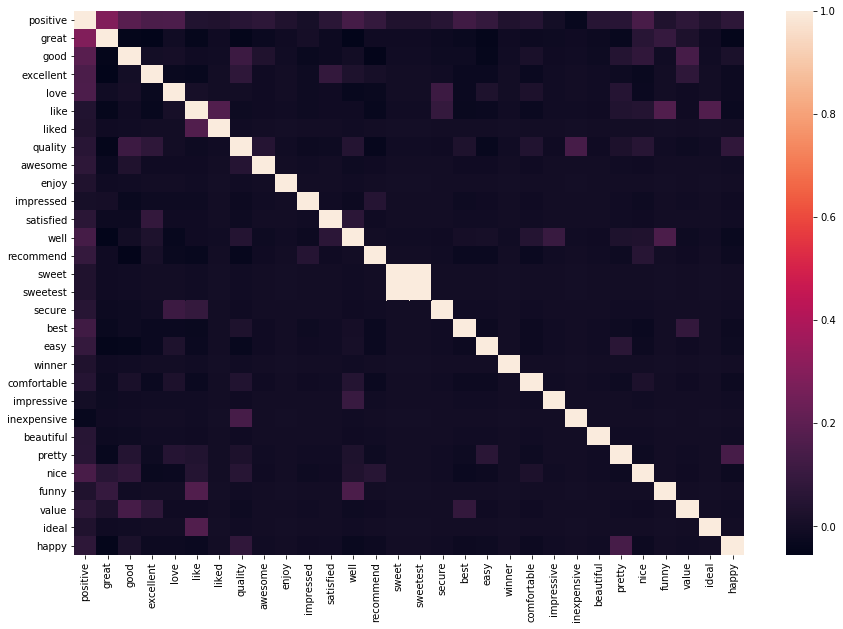

In [59]:
#use heatmap to test assumption that indicator variables are not correlated
plt.subplots(figsize=(15,10))
sns.heatmap(train.corr())
plt.show()

In [60]:
# the heatmap tells us there is minimal correlation between indicator words.  Some words are slightly correlated, likely due to 
# positive sentiment statements that combine positive words.  

#specify outcome (y = target) and inputs (data)
data = train[keywords]
target = train['positive']

#data is boolean, so import Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

#rename to shorter variable
bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify prediction and store as new variable
train['predicted'] = bnb.predict(data)

#display results and accuracy
print('Number of mislabeld points out of a total {} points: {}'.format(len(data), (target != train.predicted).sum()))
print('Model accuracy (training data): ', accuracy_score(train.positive, train.predicted))

Number of mislabeld points out of a total 1000 points: 238
Model accuracy (training data):  0.762


In [66]:
# look at misclassified statements to add more keywords
train[train['positive'] != train['predicted']].message.head()

# iterate and increase keywords

7           if you are razr owner...you must have this!
11    he was very impressed when going from the orig...
23    i have yet to run this new battery below two b...
45                       it has all the features i want
52    a usable keyboard actually turns a pda into a ...
Name: message, dtype: object

In [62]:
# test on yelp data

# import data
yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
yelp.columns = ['message', 'positive']

#standardize case 
yelp['message'] = yelp['message'].apply(lambda x: str(x).lower())

#write loop to check for keywords in yelp messages, populate data input
for key in keywords:
    yelp[str(key)] = yelp.message.str.contains(str(key), case=False)

#specify training input from 
yelp_data = yelp[keywords]
yelp_target = yelp['positive']

#predict and store as new variable
yelp['prediction'] = bnb.predict(yelp_data)

#display results and accuracy
print('Number of mislabeld points out of a total {} points: {}'.format(len(yelp_target), (yelp_target != yelp.prediction).sum()))
print('Model accuracy on yelp data: ', accuracy_score(yelp.positive, yelp.prediction))

Number of mislabeld points out of a total 1000 points: 318
Model accuracy on yelp data:  0.682


In [63]:
# test on imdb data

# import data
imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None)
imdb.columns = ['message', 'positive']

#standardize case before running test
imdb['message'] = imdb['message'].apply(lambda x: str(x).lower())

#write loop to check for keywords in imdb message, populate data input
for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)

#specify training input from 
imdb_data = imdb[keywords]
imdb_target = imdb['positive']

#predict and store as new variable
imdb['prediction'] = bnb.predict(imdb_data)

#display results and accuracy
print('Number of mislabeld points out of a total {} points: {}'.format(len(imdb_target), (imdb_target != imdb.prediction).sum()))
print('Model accuracy on yelp data: ', accuracy_score(imdb.positive, imdb.prediction))

Number of mislabeld points out of a total 748 points: 290
Model accuracy on yelp data:  0.612299465241
